
<p align="center">
</p>

<h2 align="center">UNIVERSIDAD DE GRANADA</h2>
<p align="center">
  MÁSTER DE CIENCIA DE DATOS E INGENIERÍA DE COMPUTADORES
</p>

<p align="center">
  CURSO ACADÉMICO 2023-2024
</p>

<p align="center">
  Aplicaciones de Ciencias de Datos y Tecnologías Inteligentes </p>
 <p align="center"> 
</p>

<h2 align="center">
   Ciencia de Datos al campo de las Finanzas
</h2>

<p align="center">
   Edgar Joel Pérez Rivera 1 
</p>


<p align="center">
   1.	Universidad de Granada, Máster en Ciencias de Datos e Ingeniería de computadores
</p>
<p align="center">
   email: edjperez@correo.ugr.es DNI: PA1099417
</p>

###

In [8]:
!pip install yfinance prophet scikit-learn matplotlib pandas numpy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


[*********************100%%**********************]  1 of 1 completed
C:\Users\PJ_00\AppData\Local\Temp\ipykernel_41464\24862223.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_dates = [datetime.fromordinal(int(date)) for date in future_dates_num]
c:\Users\PJ_00\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Squared Error: 283.44141934748166
R^2 Score: 0.7032079298869774


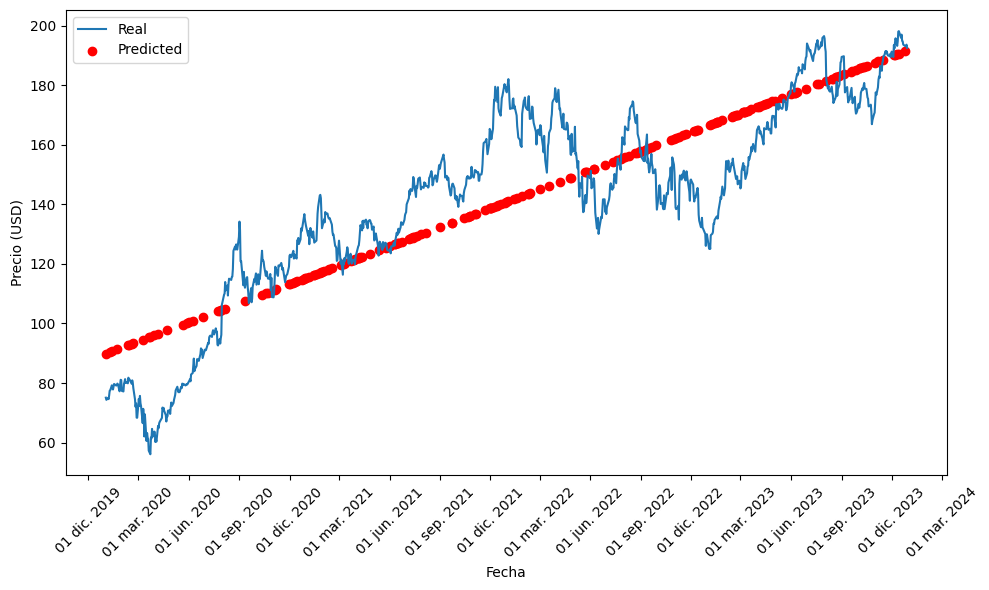

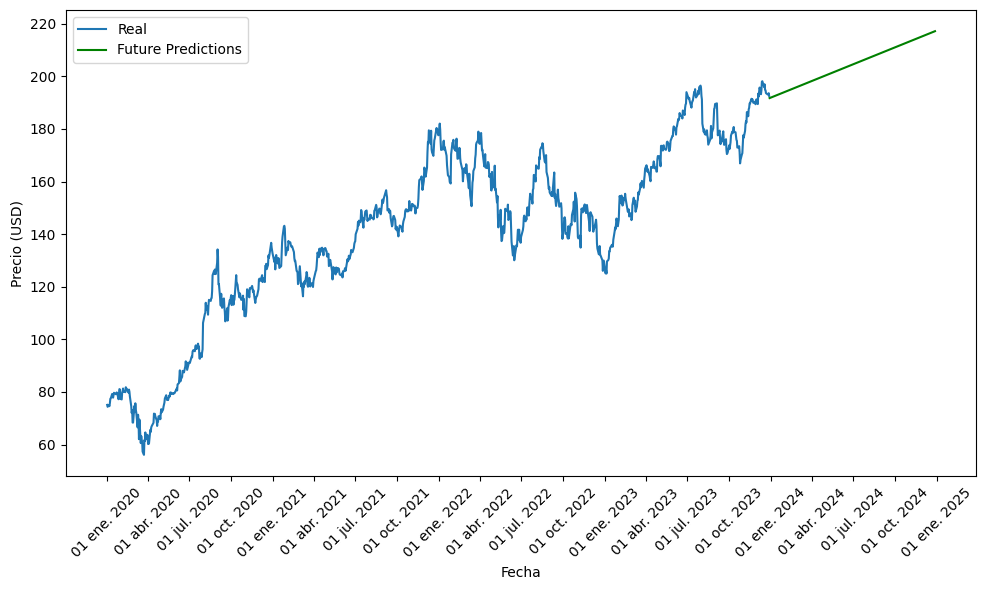

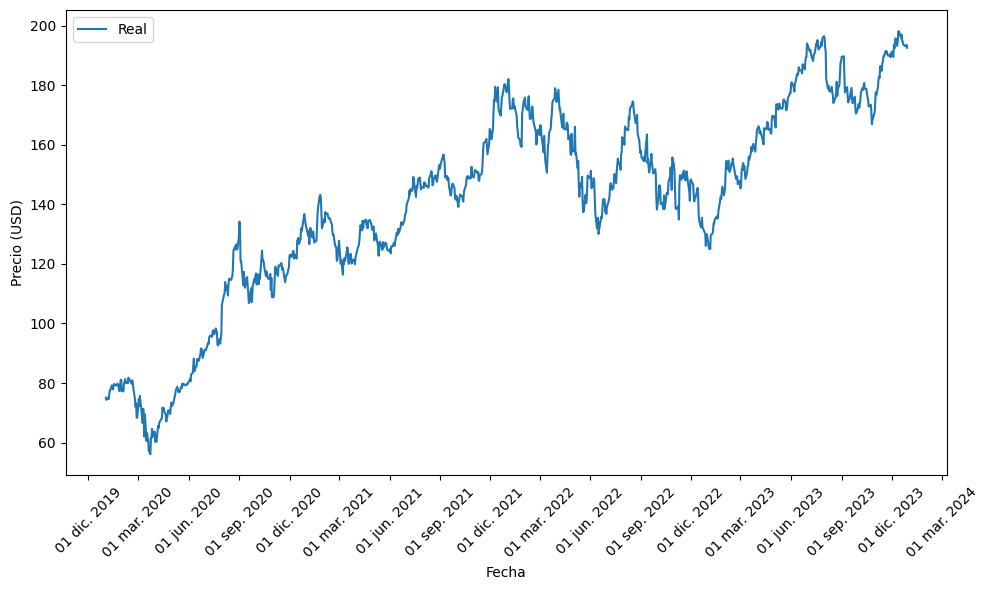

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.dates import DateFormatter, MonthLocator
import locale
from datetime import datetime

# Establecer la configuración regional para mostrar fechas en español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Descargar datos de Yahoo Finance
#data = yf.download('SAN', start='2020-01-01', end='2024-01-01') # Banco Santander
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01') # Apple Inc.

# Preprocesamiento de datos
data.reset_index(inplace=True)
data['DateNum'] = data['Date'].apply(lambda x: x.toordinal())  # Convertir a días desde el 1/1/1

# Variables independientes y dependientes
X = data[['DateNum']]
y = data['Close']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)

# Extender las predicciones hacia el futuro (365 días)
last_date_num = data['DateNum'].max()
future_dates_num = np.array([last_date_num + i for i in range(1, 366)]).reshape(-1, 1)
future_dates = [datetime.fromordinal(int(date)) for date in future_dates_num]
future_predictions = model.predict(future_dates_num)

# Gráfico de datos reales y predicciones
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Date'], data['Close'], label='Real')
ax.scatter(X_test['DateNum'].apply(lambda x: datetime.fromordinal(x)), y_pred, label='Predicted', color='red')

# Formatear el eje X para evitar empalmes en las fechas
ax.xaxis.set_major_locator(MonthLocator(interval=3))  # Mostrar una etiqueta cada 3 meses
ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))
plt.xticks(rotation=45)

ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (USD)')
ax.legend()

plt.tight_layout()
plt.savefig('datos_reales_y_predicciones.png')
plt.show()

# Gráfico de datos reales y regresión lineal con predicciones futuras
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Date'], data['Close'], label='Real')
ax.plot(future_dates, future_predictions, label='Future Predictions', color='green')

# Formatear el eje X para evitar empalmes en las fechas
ax.xaxis.set_major_locator(MonthLocator(interval=3))  # Mostrar una etiqueta cada 3 meses
ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))
plt.xticks(rotation=45)

ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (USD)')
ax.legend()

plt.tight_layout()
plt.savefig('regresion_y_predicciones_futuras.png')
plt.show()

# Gráfico de solo datos reales
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Date'], data['Close'], label='Real')

# Formatear el eje X para evitar empalmes en las fechas
ax.xaxis.set_major_locator(MonthLocator(interval=3))  # Mostrar una etiqueta cada 3 meses
ax.xaxis.set_major_formatter(DateFormatter('%d %b %Y'))
plt.xticks(rotation=45)

ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (USD)')
ax.legend()

plt.tight_layout()
plt.savefig('solo_datos_reales.png')
plt.show()


[*********************100%%**********************]  1 of 1 completed
15:16:40 - cmdstanpy - INFO - Chain [1] start processing
15:16:40 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\PJ_00\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\PJ_00\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


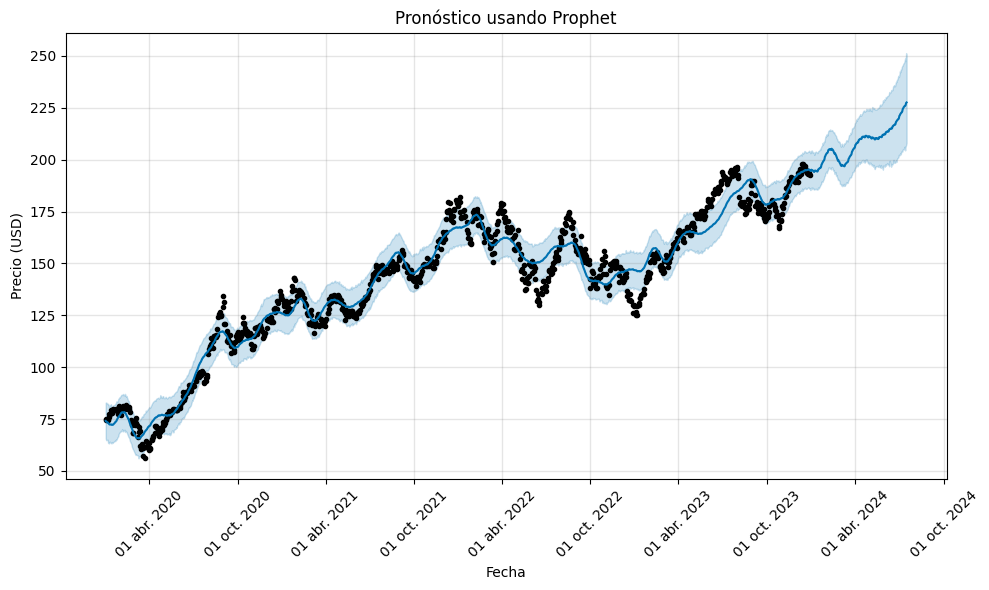

Métricas de interés para Prophet:
Mean Squared Error: 46.98861265628378
R^2 Score: 0.9576186577930664


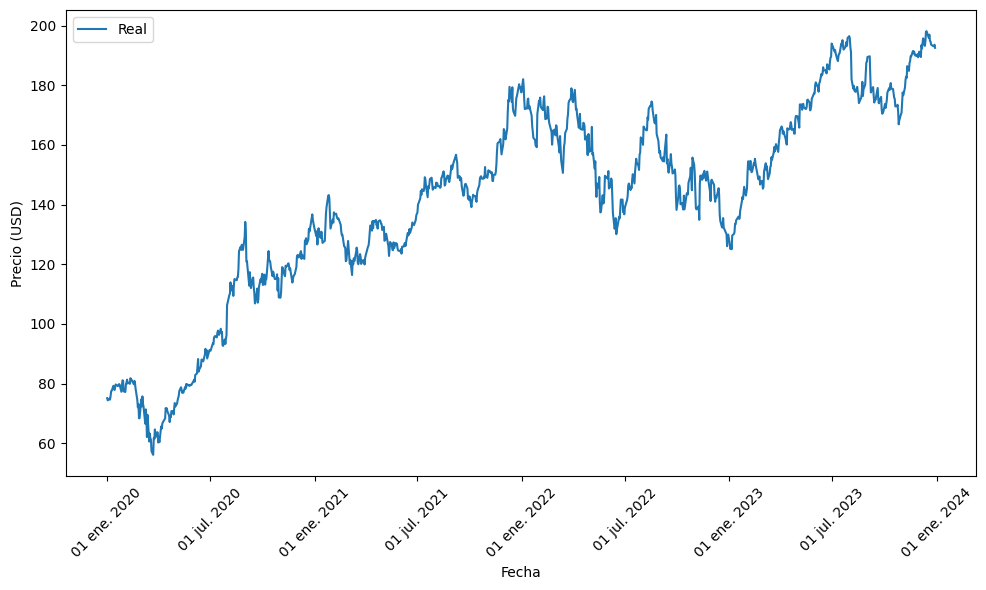

In [10]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score

# Descargar datos de Yahoo Finance
#data = yf.download('SAN', start='2020-01-01', end='2024-01-01') # Banco Santander
data = yf.download('AAPL', start='2020-01-01', end='2024-01-01')

# Preprocesamiento de datos
data.reset_index(inplace=True)

# Preparación de datos para Prophet
prophet_data = data[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

# Creación y ajuste del modelo Prophet
model_prophet = Prophet()
model_prophet.fit(prophet_data)

# Generar predicciones futuras
future = model_prophet.make_future_dataframe(periods=200)
forecast = model_prophet.predict(future)

# Gráfico de resultados de Prophet
fig, ax = plt.subplots(figsize=(10, 6))
model_prophet.plot(forecast, ax=ax)
ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (USD)')
ax.set_title('Pronóstico usando Prophet')

# Ajustar etiquetas de fecha en español
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x, unit='D').strftime('%d %b %Y')))
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('prophet_pronostico.png')
plt.show()

# Métricas de interés para Prophet
# Usar las predicciones correspondientes a las fechas reales para calcular las métricas
actual = prophet_data['y']
predicted = forecast.loc[forecast['ds'].isin(prophet_data['ds']), 'yhat']

mse_prophet = mean_squared_error(actual, predicted)
r2_prophet = r2_score(actual, predicted)
print('Métricas de interés para Prophet:')
print('Mean Squared Error:', mse_prophet)
print('R^2 Score:', r2_prophet)

# Gráfico de solo datos reales
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Date'], data['Close'], label='Real')

# Formatear el eje X para evitar empalmes en las fechas
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: pd.to_datetime(x, unit='D').strftime('%d %b %Y')))
plt.xticks(rotation=45)

ax.set_xlabel('Fecha')
ax.set_ylabel('Precio (USD)')
ax.legend()

plt.tight_layout()
plt.savefig('solo_datos_reales_prophet.png')
plt.show()